<a href="https://colab.research.google.com/github/lkostenko/ds_homeworks/blob/main/Kostenko_HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
medical_df = pd.read_csv('medical-charges.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



1. **Використання базового рівня та надбавок.**
   За базове значення можна взяти медіану `charges`, оскільки розподіл має сильну асиметрію та викиди. Далі додавати або віднімати надбавки залежно від значень віку, BMI, кількості дітей та факту куріння.

2. **Сегментація даних за ключовими ознаками.**
   Дані можна розділити на групи за категоріями `smoker`, `region` та інтервалами `age` і `bmi`. Для кожного сегмента обчислити середні або медіанні витрати і використовувати ці значення для прогнозування.

3. **Аналіз залежності числових змінних від `charges`.**
   Можна дослідити, як змінюються витрати зі зростанням віку, BMI та кількості дітей.

4. **Окремий аналіз для курців і некурців.**
   Оскільки куріння істотно впливає на розмір витрат, доцільно будувати окремі аналітичні оцінки для курців та некурців, що зменшить розкид значень і підвищить точність прогнозу.



**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Розподіл Charges за статтю')
fig.update_layout(bargap=0.1)
fig.show()

З цього графіка можна зробити кілька висновків щодо розподілу витрат (`charges`) у розрізі статі (`sex`):

### 1. Графік демонструє  правосторонню асиметрію для обох статей.

* Більшість спостережень зосереджена в лівій частині графіка (діапазон від 2 000 до 15 000).
* Більшість пацієнтів мають відносно невеликі медичні витрати.

### 2. Схожість медіан

*  медіани для чоловіків і жінок знаходяться дуже близько одна до одної.  Тобто "типовий" чоловік і "типова" жінка платять приблизно однаково.

### 3. Відмінності у розкиді та екстремумах

Хоча медіани схожі, **розподіл чоловіків (сірий колір) має "важчий хвіст"**:

* Чоловічий боксплот трохи ширший за зелений, що свідчить про більшу варіативність витрат у чоловіків.
*  У діапазоні 35k–45k сірі стовпчики візуально трохи вищі за зелені. Це натякає на те, що серед пацієнтів з дуже високими витратами (ймовірно, курців) чоловіків трохи більше, або їх лікування коштує дорожче.

### 4.Гістограма не спадає плавно.

* Ми бачимо чіткий пік на початку (0–15k). Потім спад, і знову підйом у районі 35k–45k. Оскільки графік показує тільки стать, а сплеск є і в чоловіків, і в жінок, це підтверджує, що головний драйвер ціни не стать, а щось інше (найімовірніше, статус курця)

### Підсумок

Стать (`sex`) **не є сильним предиктором** для більшості випадків, оскільки базові витрати у чоловіків і жінок майже однакові. Однак стать може грати роль у прогнозуванні **екстремально високих витрат**.

In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Розподіл Charges за регіоном')
fig.update_layout(bargap=0.1)
fig.show()

### 1. Регіон не впливає на "базову" вартість (Схожість медіан)
### 2. (Southeast) — регіон підвищеного ризику.
 Найдовший розподіл та найвищі аутлаєри
### 3. Форма розподілу однакова для всіх регіонів.
Всі регіони демонструють ту ж саму правосторонню асиметрію.
Всі регіони мають той самий горб у районі 40k.

### Висновок:
Головні драйвери ціни (куріння, ожиріння, вік) діють однаково по всій країні. Регіон не змінює структуру ціноутворення, він лише трохи змінює частоту появи дорогих випадків

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [7]:
px.histogram(medical_df, x='region', color='smoker', title='Smoker')

Для кожного регіону курців менше. В регіоні Southeast курців найбільше. Це може рояснювати попередній графік - чому в цьому регіоні були найвищі charges

In [8]:
px.histogram(medical_df, x='children', color='smoker', title='Smoker')

Хоча висота стовпчиків зменшується зліва направо (людей з 0 дітей набагато більше, ніж людей з 5 дітьми), співвідношення курців до не курців залишається приблизно однаковим у кожній групі.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [9]:
fig = px.violin(
    medical_df,
    x="children",
    y="charges",
    box=True,
    points="all",
    title="Звʼязок між кількістю дітей та медичними витратами (charges)")

fig.show()

Сама по собі наявність дітей не призводить до різкого зростання типових (медіанних) витрат. Здається, що кількість дітей слабко корелює з базовою вартістю страховки.

У датасеті  дуже мало людей з 5 дітьми (як ми бачили на попередньому графіку), і серед цих небагатьох випадково не виявилося курців чи з ожирінням. Якби вибірка була більшою, ця скрипка, ймовірно, виглядала б так само, як і інші.


**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [10]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [11]:
def estimate_charges(age, w, b):
    return w * age + b

In [12]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

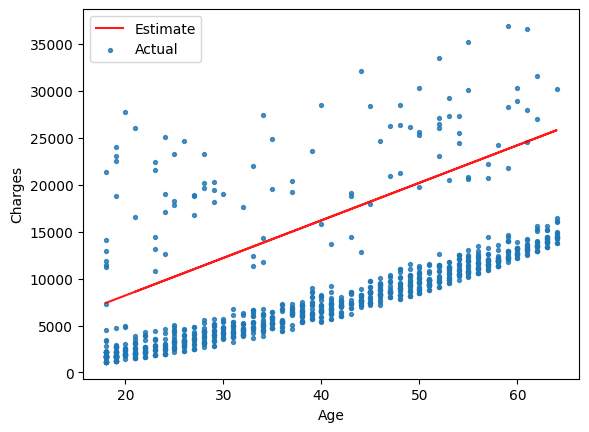

In [14]:
try_parameters(non_smoker_df, 400, 200)

Спроба "середнього" між кластерами
Ці параметри намагаються знайти компроміс між нижньою групаою та верхніми аутлаєрами. У результаті лінія не влучає в жодну з груп

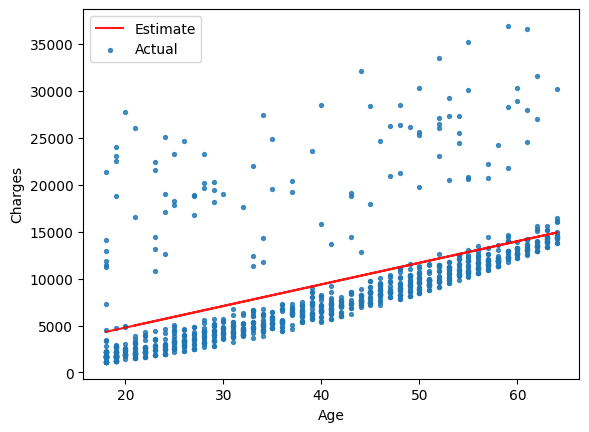

In [29]:
try_parameters(non_smoker_df, 230, 180)

 все ще трохи завищує прогноз, але вже краще, ніж попередній варіант.

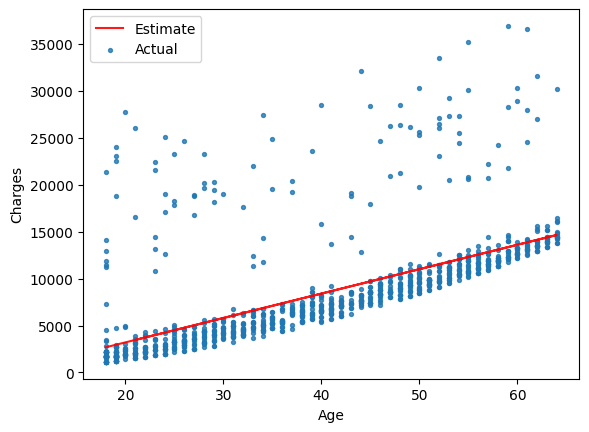

In [26]:
try_parameters(non_smoker_df, 260, -2000)

Ця лінія краще описує типового некурця, ігноруючи верхні викиди

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [30]:
import numpy as np

In [31]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [34]:
pairs = [400, 200], [230, 180], [260, -2000]

In [42]:
targets = non_smoker_df['charges']
for w, b in pairs:
  predicted = estimate_charges(non_smoker_df.age, w, b)
  error = rmse(targets, predicted)
  print(f"w={w}, b={b} , RMSE = {error:.2f}")


w=400, b=200 , RMSE = 9043.20
w=230, b=180 , RMSE = 4760.35
w=260, b=-2000 , RMSE = 4667.66


In [44]:
non_smoker_df.charges.describe()

,charges
count,1064.000000
mean,8434.268298
std,5993.781819
min,1121.873900
25%,3986.438700
50%,7345.405300
75%,11362.887050
max,36910.608030


найменший RMSE = 4667.66 при w=260, b=-2000

Я вважаю, що його можна ще трохи зменшити, але графік показує, що дані мають великий розкид, який не залежить від віку. Лінійна модель від віку не може пояснити ці варіації, тому помилка не зникне повністю.